# Reconstructing $D$ mesons

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Mesons.
</ul>

To prepare for this activity, you should already have looked at the activity on <a href="https://github.com/particle-physics-playground/playground/blob/master/activities/ACTIVITY_dimuon_spectrum.ipynb">how to reconstruct particles from their decay products</a> and <a href="https://github.com/particle-physics-playground/playground/blob/master/activities/hello_CLEO.ipynb">how to interface with CLEO data</a>.

After you are familiar with those activities, use the <a href="https://github.com/particle-physics-playground/playground/blob/master/activities/download_more_data.ipynb">download-more-data notebook</a> and grab the Monte Carlo file that simulates the following decay:

$$D^+ \rightarrow K^- \pi^+ \pi^+$$ 
Also grab the CLEO data file. 

Your challenge is to reconstruct the $D^+$ meson in the Monte Carlo and then go to the data and see if you can find the $D^+$ in the same decay mode. Things to think about:

* Make sure you deal with all possible $K\pi\pi$ combinations.
* How much background is there under the peak in the data? How might you eliminate it? Can you eliminate all of it?
* Is there "structure" in the $K\pi$ systems? That is, when you plot the invariant mass of the $K\pi$ system, do you see any peaks?
* Can you make a <a href="https://en.wikipedia.org/wiki/Dalitz_plot">Dalitz</a> <a href="http://www2.warwick.ac.uk/fac/sci/physics/staff/academic/gershon/talks/gershon-BadHonnef.pdf">plot</a> for this decay mode?
* Can you find the other decay modes in the data that you have MC for? 

Have fun and good luck!

$D^+$ are the lightest particles containing charm quarks
* Made up of a charm and anti-down quark
* Mass = 1.87 GeV

$K^-$ is the anti-particle of the Kaon or K Meson
* Made up of an anti-up and an strange quark (Anti-quark + quark = MESON)
* Mass = 0.494 GeV

$\pi^+$ 
* Made up of an up and anti-down quark
* Mass = 0.140 GeV

In [3]:
import sys
sys.path.append("../tools/")
import cms_tools
import cleo_tools as cleo
import matplotlib.pyplot as plt
%matplotlib inline

infile = open("../data/Single_D0B_to_KK_ISR_LARGE.dat","r")
infile1 = open("../data/small_CLEO_test_file.dat", "r")


print "Reading in the data...."
collisions_mc = cleo.get_collisions(infile)
collisions_cleo = cleo.get_collisions(infile1)

print len(collisions_mc)
print len(collisions_cleo)

Reading in the data....
9715
101


In [4]:
from math import sqrt
def mass(E,px,py,pz):
    m1 = (E**2-(px**2+py**2+pz**2))
    if m1>=0:
        return sqrt(m1)
    else:
        return sqrt(-m1)

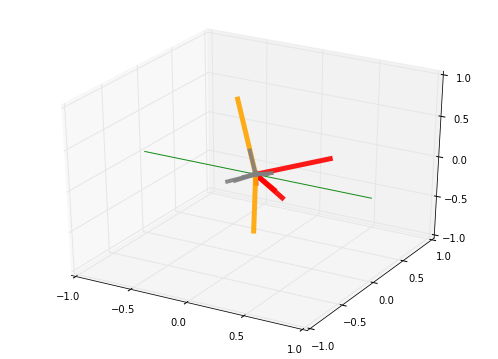

In [12]:
cleo.display_collision3D(collisions_mc[0])

In [7]:
masses = []

for collision_mc in collisions_mc:
    
    jets,muons,electrons,photons,met = collision_mc
    
    for jet in jets:
        E,px,py,pz,q = jet
        #print E,q
        m = mass(E,px,py,pz)
        #print m
        masses.append(m)
    
        if m >= 1.86:
            print "This is not a D meson"
        elif m <= 1.88:
            print "This is not a D meson"
        else:
            print "This is a D meson"
    
for collision_cleo in collisions_cleo:
    
    jets,muons,electrons,photons,met = collision_cleo

ValueError: too many values to unpack